# Implementing Feature Union
Using the given custom transformer, `StartingVerbExtractor`, add a feature union to your pipeline to incorporate a feature that indicates with a boolean value whether the starting token of a post is identified as a verb.

In [1]:
import nltk
nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kaiqu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kaiqu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kaiqu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
import re
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [3]:
from custom_transformer import StartingVerbExtractor

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kaiqu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kaiqu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kaiqu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

### Build your pipeline to have this structure:
- Pipeline
    - feature union
        - text pipeline
            - count vectorizer
            - TFIDF transformer
        - starting verb extractor
    - classifier

In [5]:
def model_pipeline():
    pipeline = Pipeline([
        ('features', FeatureUnion([
            ('text_pipeline', Pipeline([
                ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer())
            ])),
            ('verbextractor', StartingVerbExtractor())
        ])),
        ('clf', RandomForestClassifier())
    ]) 
    return pipeline

### Run program to test

Labels: ['Action' 'Dialogue' 'Information']
Accuracy: 0.9500831946755408


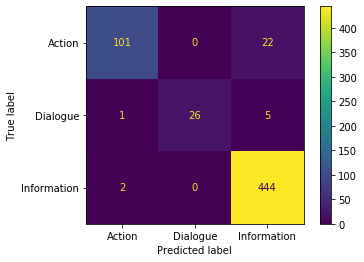

In [6]:
def load_data():
    df = pd.read_csv('../Data/corporate_messaging.csv', encoding='latin-1')
    df = df[(df["category:confidence"] == 1) & (df['category'] != 'Exclude')]
    X = df.text.values
    y = df.category.values
    return X, y


def tokenize(text):
    detected_urls = re.findall(url_regex, text)
    for url in detected_urls:
        text = text.replace(url, "urlplaceholder")

    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens


def display_results(y_test, y_pred, X_test, estimator):
    labels = np.unique(y_pred)
    plot_confusion_matrix(estimator, X_test, y_test, labels=labels)
    

    print("Labels:", labels)
    print("Accuracy:", accuracy_score(y_test, y_pred))


def main():
    X, y = load_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    model = model_pipeline()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    display_results(y_test, y_pred, X_test, model)

main()